C:\Users\nilee\AppData\Local\Temp\ipykernel_3808\2303780364.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row_df.rename(index={first_row_df.index[0]: ticker}, inplace=True)
C:\Users\nilee\AppData\Local\Temp\ipykernel_3808\2303780364.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_data)


      numberOfAnalysts   avg   low  high  yearAgoEps  growth
ASC                  4  0.73  0.71  0.75        0.49   0.490
AXR                  0  0.00  0.00  0.00         NaN     NaN
CHCI                 0  0.00  0.00  0.00         NaN     NaN
EGY                  2  0.17  0.17  0.18        0.07   1.429
GAMB                 7  0.18  0.15  0.20        0.13   0.385
IDR                  1  0.20  0.20  0.20        0.03   5.667
MDXG                 5  0.04  0.04  0.05        0.06  -0.333
OPXS                 0  0.00  0.00  0.00         NaN     NaN
RDVT                 1  0.23  0.23  0.23         NaN     NaN

Descriptive Statistics:
       numberOfAnalysts       avg       low      high  yearAgoEps    growth
count          9.000000  9.000000  9.000000  9.000000     5.00000  5.000000
mean           2.222222  0.172222  0.166667  0.178889     0.15600  1.527600
std            2.538591  0.229607  0.223607  0.235130     0.19021  2.397308
min            0.000000  0.000000  0.000000  0.000000     0.0

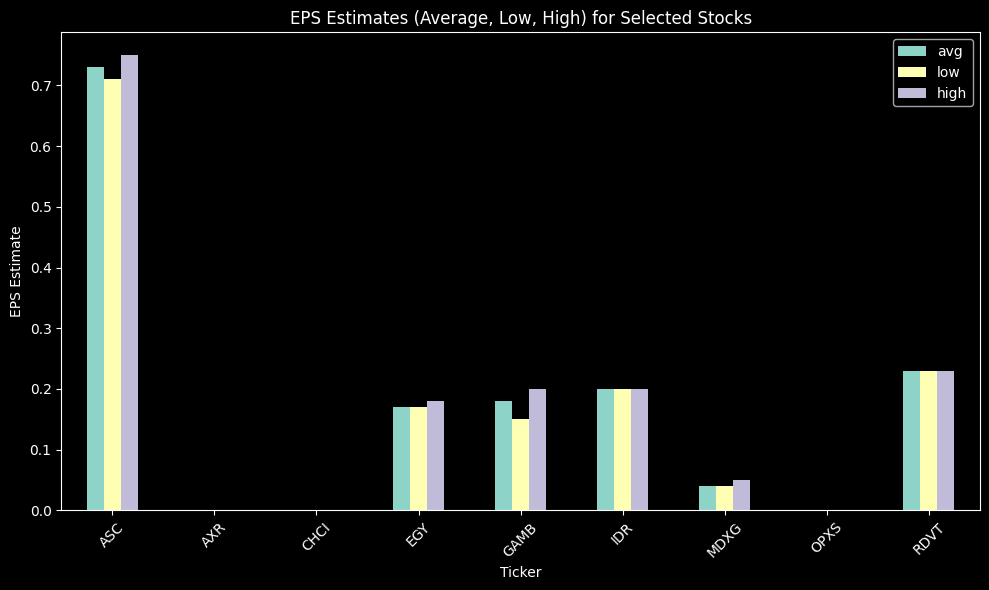

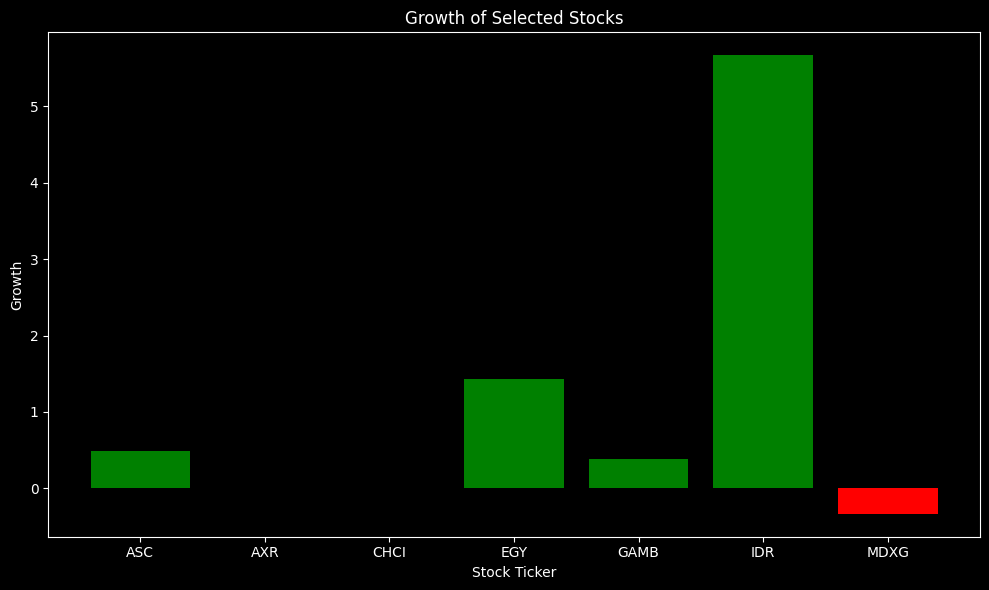

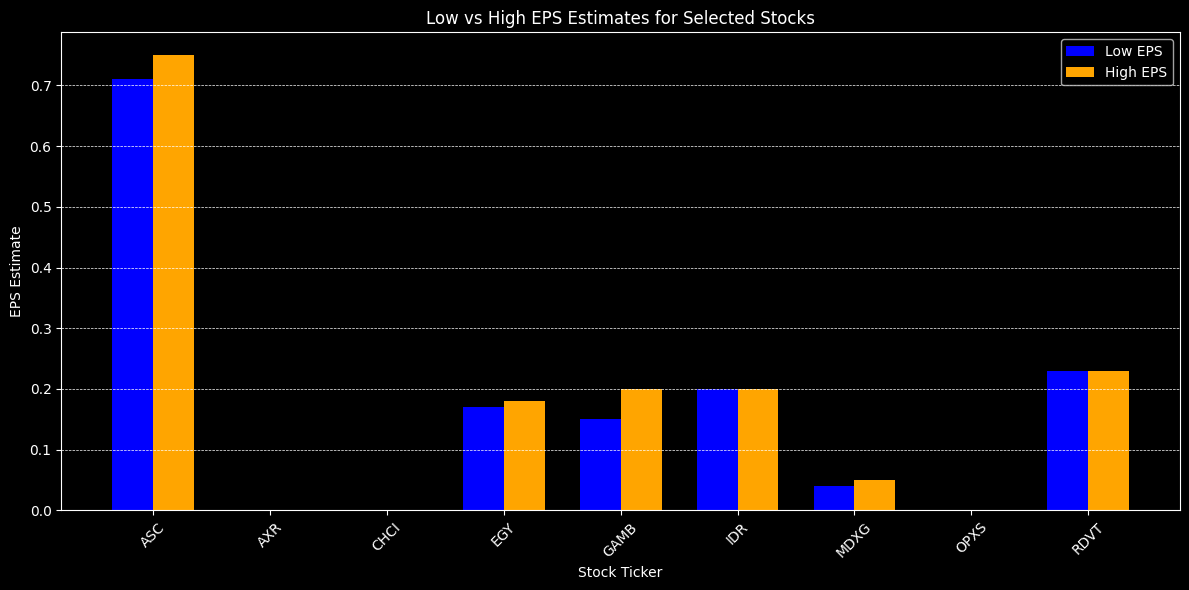


EPS Range (High - Low) for Each Company:
      eps_range
ASC        0.04
AXR        0.00
CHCI       0.00
EGY        0.01
GAMB       0.05
IDR        0.00
MDXG       0.01
OPXS       0.00
RDVT       0.00

Company with the highest EPS range: GAMB (0.05000000000000002)
Company with the lowest EPS range: AXR (0.0)


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to get analyst data
def get_analyst_data(ticker):
    """
    Fetches the earnings estimate data for a specific stock ticker from Yahoo Finance,
    selects the first row, and renames its index.

    Args:
    ticker (str): The stock ticker symbol (e.g., 'AAPL').

    Returns:
    pd.DataFrame: A DataFrame with the first row of earnings estimate data, renamed.
    """
    # Fetch the earnings estimate for the ticker
    stock = yf.Ticker(ticker)
    earnings_estimate = stock.earnings_estimate

    # If there is no earnings estimate, return an empty DataFrame
    if earnings_estimate is None or earnings_estimate.empty:
        print(f"No earnings estimate available for {ticker}")
        return pd.DataFrame()

    # Select the first row and rename the index
    first_row_df = earnings_estimate.iloc[[0]]
    first_row_df.rename(index={first_row_df.index[0]: ticker}, inplace=True)

    return first_row_df

# Function to get multiple analyst data
def get_multiple_analyst_data(tickers):
    """
    Fetches the earnings estimate data for multiple stock tickers.

    Args:
    tickers (list of str): List of stock ticker symbols.

    Returns:
    pd.DataFrame: A concatenated DataFrame with earnings estimate data for all given tickers.
    """
    all_data = []
    for ticker in tickers:
        data = get_analyst_data(ticker)
        if not data.empty:
            all_data.append(data)
    
    if all_data:
        combined_df = pd.concat(all_data)
    else:
        combined_df = pd.DataFrame()
    
    return combined_df

# List of tickers for analysis
tickers = ["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"]

# Fetch the data for multiple tickers
combined_df = get_multiple_analyst_data(tickers)

# Display the combined DataFrame
print(combined_df)

# Additional Analysis
if not combined_df.empty:
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(combined_df.describe())

    # Visualization - Bar chart for EPS estimates
    plt.style.use('dark_background')
    combined_df[['avg', 'low', 'high']].plot(kind='bar', figsize=(10, 6))
    plt.title('EPS Estimates (Average, Low, High) for Selected Stocks')
    plt.xlabel('Ticker')
    plt.ylabel('EPS Estimate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plotting growth
    colors = ['green' if value > 0 else 'red' for value in combined_df['growth']]
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df.index, combined_df['growth'], color=colors)
    plt.title('Growth of Selected Stocks')
    plt.xlabel('Stock Ticker')
    plt.ylabel('Growth')
    plt.tight_layout()
    plt.show()

    # EPS Range Analysis
    combined_df['eps_range'] = combined_df['high'] - combined_df['low']

    # Plotting low vs high EPS for each stock
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    indices = range(len(combined_df))

    plt.bar(indices, combined_df['low'], width=bar_width, label='Low EPS', color='blue')
    plt.bar([i + bar_width for i in indices], combined_df['high'], width=bar_width, label='High EPS', color='orange')

    # Set plot titles and labels
    plt.title('Low vs High EPS Estimates for Selected Stocks')
    plt.xlabel('Stock Ticker')
    plt.ylabel('EPS Estimate')
    plt.xticks([i + bar_width / 2 for i in indices], combined_df.index, rotation=45)
    plt.legend()

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.style.use('dark_background')
    plt.show()

    # Analysis of EPS Range
    print("\nEPS Range (High - Low) for Each Company:")
    print(combined_df[['eps_range']])

    # Identify company with the highest and lowest EPS range
    max_range_ticker = combined_df['eps_range'].idxmax()
    min_range_ticker = combined_df['eps_range'].idxmin()

    print(f"\nCompany with the highest EPS range: {max_range_ticker} ({combined_df.loc[max_range_ticker, 'eps_range']})")
    print(f"Company with the lowest EPS range: {min_range_ticker} ({combined_df.loc[min_range_ticker, 'eps_range']})")
